### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-22/11/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN-1D + LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Nota: Probar Dropout

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 3, 22))
x_test = x_test.reshape((n_samples_test, 1, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1, 3, 22)
(288, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 56us/sample - loss: 1.7974 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[41 17  5  9]
 [22 43  6  1]
 [19  0 28 25]
 [13  2 24 33]]
(0.5137164741391747, 0.5034722222222222, 0.5047630987728404, None)


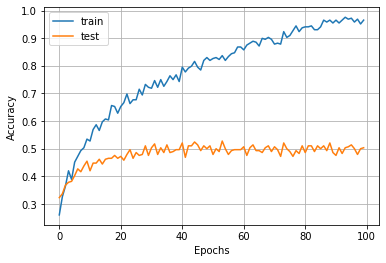

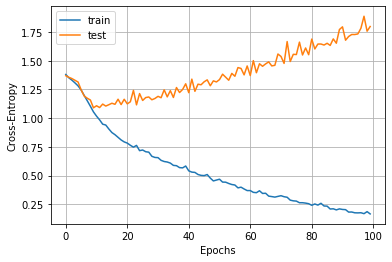

Iteration: 2
288/288 [==============================] - 0s 52us/sample - loss: 1.8901 - acc: 0.5139
kappa:  0.35185185185185186
confusion matrix:
 [[52  9  6  5]
 [32 33  5  2]
 [20  0 27 25]
 [17  3 16 36]]
(0.5481242910387295, 0.5138888888888888, 0.5114549526466625, None)


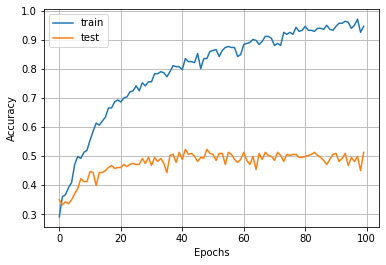

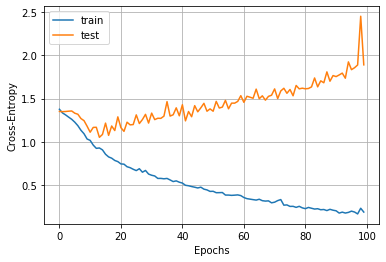

Iteration: 3
288/288 [==============================] - 0s 67us/sample - loss: 1.8227 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[32 25  7  8]
 [13 50  8  1]
 [12  3 30 27]
 [11  1 31 29]]
(0.48609757898957257, 0.48958333333333337, 0.48703939560274456, None)


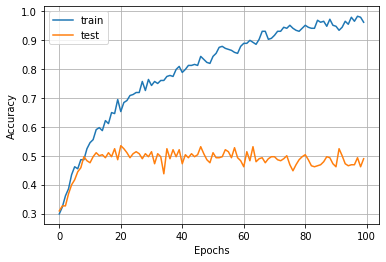

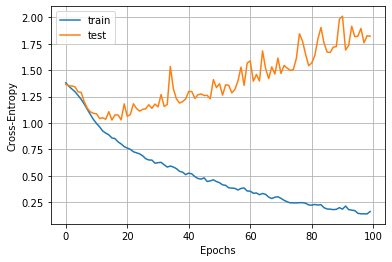

Iteration: 4
288/288 [==============================] - 0s 62us/sample - loss: 1.7452 - acc: 0.5139
kappa:  0.35185185185185186
confusion matrix:
 [[29 28 10  5]
 [ 9 54  7  2]
 [12  6 30 24]
 [11  5 21 35]]
(0.5068836245617905, 0.5138888888888888, 0.5066133713730968, None)


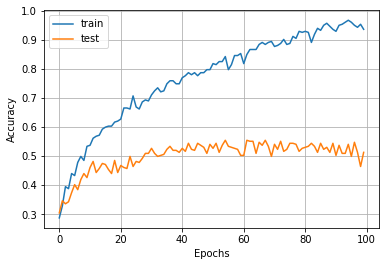

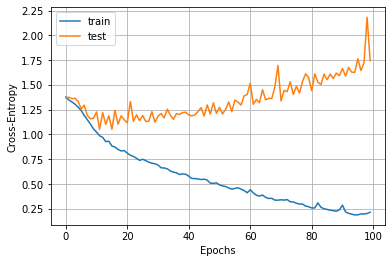

Iteration: 5
288/288 [==============================] - 0s 57us/sample - loss: 1.7083 - acc: 0.5208
kappa:  0.36111111111111116
confusion matrix:
 [[47 12  4  9]
 [26 36  8  2]
 [12  0 32 28]
 [13  0 24 35]]
(0.543288261250446, 0.5208333333333333, 0.5223840221019914, None)


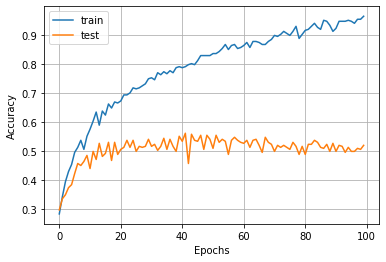

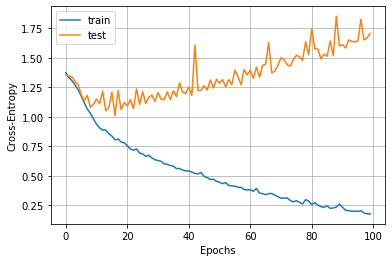

Iteration: 6
288/288 [==============================] - 0s 79us/sample - loss: 2.0961 - acc: 0.4688
kappa:  0.29166666666666663
confusion matrix:
 [[46 11  9  6]
 [33 29  9  1]
 [18  0 26 28]
 [16  3 19 34]]
(0.4967375716389201, 0.46875, 0.4672749530288846, None)


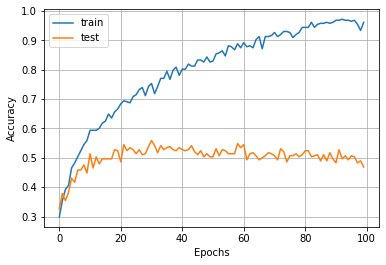

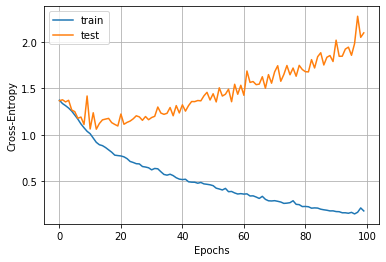

Iteration: 7
288/288 [==============================] - 0s 66us/sample - loss: 1.8661 - acc: 0.5069
kappa:  0.34259259259259256
confusion matrix:
 [[45 18  2  7]
 [25 38  6  3]
 [12  1 29 30]
 [11  2 25 34]]
(0.5137850398238589, 0.5069444444444444, 0.5060491156908319, None)


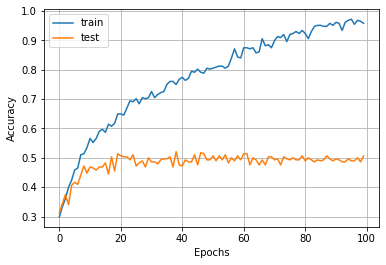

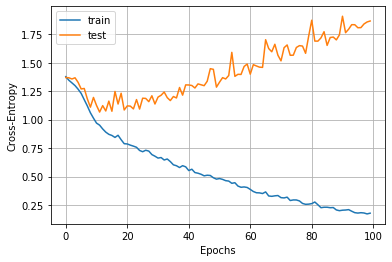

Iteration: 8
288/288 [==============================] - 0s 58us/sample - loss: 1.6622 - acc: 0.5208
kappa:  0.36111111111111116
confusion matrix:
 [[44 18  5  5]
 [22 42  7  1]
 [14  3 26 29]
 [11  2 21 38]]
(0.522724060244376, 0.5208333333333334, 0.5185251206662157, None)


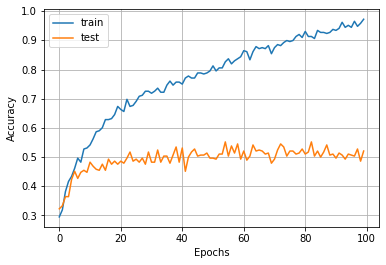

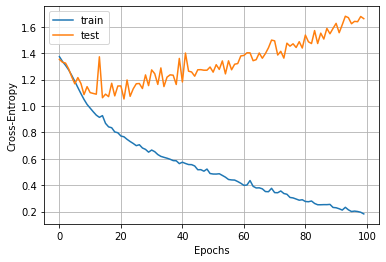

Iteration: 9
288/288 [==============================] - 0s 81us/sample - loss: 1.8026 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[28 31  6  7]
 [16 47  7  2]
 [16  3 24 29]
 [11  4 20 37]]
(0.4654233346414919, 0.4722222222222222, 0.46645722251452615, None)


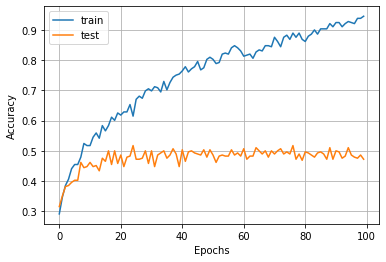

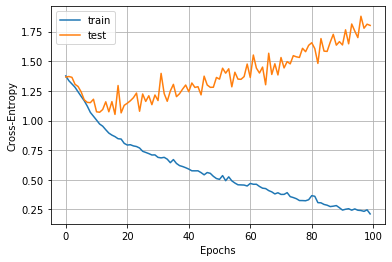

Iteration: 10
288/288 [==============================] - 0s 69us/sample - loss: 1.6670 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[37 22  4  9]
 [19 41 10  2]
 [14  0 28 30]
 [15  1 20 36]]
(0.4987661221013332, 0.4930555555555555, 0.4938526700899209, None)


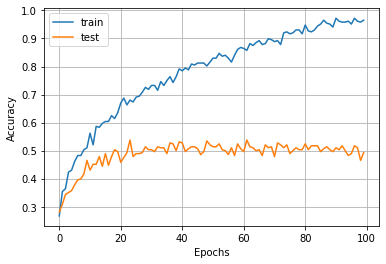

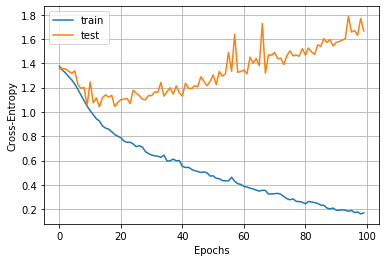


Resultados:
loss: [1.7974063555399578, 1.8900768624411688, 1.822693453894721, 1.7451560497283936, 1.7082866960101657, 2.096071388986376, 1.8661440081066556, 1.6621725824144151, 1.8025945822397869, 1.6670024394989014]
accuracy: [0.5034722, 0.5138889, 0.48958334, 0.5138889, 0.5208333, 0.46875, 0.5069444, 0.5208333, 0.4722222, 0.49305555]
kappa: [0.3379629629629629, 0.35185185185185186, 0.3194444444444444, 0.35185185185185186, 0.36111111111111116, 0.29166666666666663, 0.34259259259259256, 0.36111111111111116, 0.2962962962962963, 0.32407407407407407]
precision: [0.5137164741391747, 0.5481242910387295, 0.48609757898957257, 0.5068836245617905, 0.543288261250446, 0.4967375716389201, 0.5137850398238589, 0.522724060244376, 0.4654233346414919, 0.4987661221013332]
recall: [0.5034722222222222, 0.5138888888888888, 0.48958333333333337, 0.5138888888888888, 0.5208333333333333, 0.46875, 0.5069444444444444, 0.5208333333333334, 0.4722222222222222, 0.4930555555555555]
f1: [0.5047630987728404, 0.511454952

In [11]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,3,22)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [12]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_18 (TimeDis (None, None, 1, 32)       2144      
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 32)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 260       
Total params: 27,236
Trainable params: 27,236
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5003
std: (+/- 0.0179)
kappa: 0.3338
precision: 0.5096
recall: 0.5003
f1: 0.4984
